In [3]:
import re
import os

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from matplotlib.patches import Patch
from Bio import motifs
from Bio.Seq import Seq


# Setup

In [4]:
lothar = '/home/enno/uni/SS24/thesis/1_seq_analysis'

if os.getcwd() == lothar:
    pos_df = pd.read_csv('/home/enno/uni/SS24/thesis/data/hendecads/annoted.csv')
    clans_file = '/home/enno/uni/SS24/thesis/1_seq_analysis/5R_hendecad_strict_TMP_full_cd_out_30k1E-3_out.clans'
    fasta_file = '/home/enno/uni/SS24/thesis/1_seq_analysis/5R_hendecad_strict_TMP_full_cd_out.fasta'
    clans_r7 = '/home/enno/uni/SS24/thesis/CLANS/7R.clans'
    fasta_r7 = '/home/enno/uni/SS24/thesis/CLANS/7R.fasta'
else:
    pos_df = pd.read_csv('/ebio/abt1_share/prediction_hendecads/1_repo/2_ss_pred/dataset/annotated_df.csv')
    clans_file = '/ebio/abt1_share/prediction_hendecads/1_repo/1_seq_analysis/5R_hendecad_strict_TMP_full_cd_out_30k1E-3_out.clans'
    fasta_file = '/ebio/abt1_share/prediction_hendecads/0_data/1_seq_analysis/cd_hit_out/5R_hendecad_strict_TMP_full_cd_out.fasta'

In [17]:
# There are 5,851 TMP sequences and 1,607 TMP sequences with at least one 5R hit.
# There are a total of 11,235 5R hits across TMP sequences.
# These 11k hits were condensed to 4,585 hits by CD-HIT

tmp_df = pos_df.loc[(pos_df['reduced_group'] == 'TMP') & (pos_df['7R_hendecad_strict'] > 0)]

In [18]:
def parse_numbers(filename):
    # Extracts the cluster assignment for 5R hits from the .clans file

    clusters = []
    with open(filename, 'r') as file:
       
        for line in file:
            
            if re.match('numbers=', line):
                
                _, num_str = line.split('=')
                numbers = [int(num.strip()) for num in num_str.split(';')[:-1]]

                clusters.append(numbers)
    
    return clusters

In [19]:
def parse_cluster_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    clusters = {}
    current_representative = None

    for line in lines:
        if line.startswith('>Cluster'):
            # This line is the start of a new cluster, so the next line will contain the representative sequence
            current_representative = None
        else:
            # This line contains a sequence
            sequence = line.split(', ')[1].split('...')[0].strip()
            if current_representative is None:
                # This is the first sequence in the cluster, so it's the representative sequence
                current_representative = sequence
            clusters[sequence[1:]] = current_representative[1:]

    return clusters

In [20]:
clusters = parse_cluster_file('/home/enno/uni/SS24/thesis/CLANS/7R.clstr')

In [21]:
len(clusters)

5406

In [22]:
tmp_df

,id,seq,stretch_ix,stretch_seq,avg_cc,group_id,group_ix,1R_hendecad_loose,1R_ratio_hendecad_loose,1R_ix_hendecad_loose,...,10R_ix_hendecad_alanine,10R_heptad,10R_ratio_heptad,10R_ix_heptad,y,x,_,group,reduced_group,annotation
73,MBQ9252633.1,MAEGHEVARAVVTIIPSLKGSQQSIVKELTGSTDKAAKSAGKSAGG...,"[281, 618]",lsifggesgggllnnvlpvvqtafngvadfistaapiilpritelv...,0.000212,group_0,3,103,0.314985,"[(11, 22), (12, 23), (15, 26), (19, 30), (26, ...",...,[],0,0.0,[],-158.85950,-92.425940,0.0,3,TMP,Other
169,WP_204698829.1,MALRELEVEIGFnidtgvlddmnesidsamsgldalgqsgddmgag...,"[388, 734]",alngaeaiigafdglqeaeslgdvfmgivdgfgnlfeglfdvvssv...,0.000207,group_0,3,138,0.410714,"[(0, 11), (1, 12), (7, 18), (10, 21), (20, 31)...",...,[],0,0.0,[],-153.46349,-72.771190,0.0,3,TMP,Other
305,MBQ3969252.1,Mdvfdlfakisldtreyeeglkkaigaaknvktavsslsspidkvk...,"[446, 684]",tfvekiapiieeklpsiveealpsflsaamsivngiiaalptligi...,0.000299,group_0,3,70,0.307018,"[(2, 13), (6, 17), (9, 20), (13, 24), (20, 31)...",...,[],0,0.0,[],-165.57428,-90.785450,0.0,3,TMP,Other
364,HIZ80720.1,MADYTLSAKITGDSSGFDKAIQSAEKAASSFEKKMESISSKAKSIG...,"[460, 747]",alvaafaylmatdegfrnsvmqtistigqslvpviqalmpviqnia...,0.000248,group_0,3,108,0.389892,"[(1, 12), (2, 13), (3, 14), (19, 30), (23, 34)...",...,[],0,0.0,[],-129.35657,-110.836624,0.0,3,TMP,TMP
374,PWL97409.1,MAGRIMELAIAIKGRLDGSVTSSMQKAVSESRKLQKQLTQANRAMQ...,"[627, 883]",aarvvwfaikavivivavaitsvmwamahaimaiwqaigptvmavw...,0.000277,group_0,3,103,0.418699,"[(0, 11), (1, 12), (3, 14), (4, 15), (7, 18), ...",...,[],0,0.0,[],-130.85904,-112.560000,0.0,3,TMP,TMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40441,UKI16746.1,MITKAAITASAAASAAVGALAKEAIASFGDYEQLAGGAQLMFGEAY...,"[185, 461]",gyaqaegadtlqgsmasmtaawqnmltgmadptqdfdrlvsdlids...,0.000258,group_0,3,87,0.327068,"[(7, 18), (10, 21), (17, 28), (39, 50), (42, 5...",...,[],0,0.0,[],-162.66167,-91.311150,0.0,3,TMP,Other
40534,WP_185718426.1,MAFTIATGVLKVTADTTKAVSALAALGGAAGLAGGALAALPALGAA...,"[513, 883]",nltpgmdafgvildttlgavgsllpmlgtlisvlanalapafailm...,0.000194,group_0,3,124,0.344444,"[(5, 16), (11, 22), (12, 23), (16, 27), (18, 2...",...,[],0,0.0,[],-106.01613,-122.000740,0.0,3,TMP,Other
40537,MBE6005589.1,MSGHAAGSIAKTKKELQSFAQQTIYSASDMATTYAQLDAVGIKSAK...,"[379, 635]",kalmpaamigaalaglgllqekfgeqingilsmvqekgpqiisnla...,0.000278,group_0,3,78,0.317073,"[(1, 12), (3, 14), (5, 16), (6, 17), (8, 19), ...",...,[],0,0.0,[],-130.19122,-77.762700,0.0,3,TMP,Other
40567,WP_122014491.1,MASQKELRALITLAGKVDPSLQTALMTASAQTSKASRTFSKLGSFA...,"[179, 469]",adrnalafklfgrgaaelfpilnagtdeiqklaaeadklglvmsge...,0.000245,group_0,3,104,0.371429,"[(14, 25), (21, 32), (28, 39), (31, 42), (33, ...",...,[],0,0.0,[],-149.08370,-79.520780,0.0,3,TMP,Other


In [25]:
clusters = parse_cluster_file('/home/enno/uni/SS24/thesis/CLANS/7R.clstr')

print(clusters['YP_003714744.1_[31,108]'])  

YP_003714744.1_[24,101]


In [29]:
numbers = parse_numbers(clans_r7)

In [30]:
C1 = numbers[0]
C2 = numbers[1]
C3 = numbers[2]
C4 = numbers[3]

In [33]:
with open (fasta_r7, 'r') as file:
    fasta = file.readlines()

fasta = [line.strip() for line in fasta]

fasta_ids = [sid[1:].split('[')[0][:-1] for sid in fasta[::2]] 
fasta_ixs = [eval(sid[1:].split('_')[-1]) for sid in fasta[::2]]
fasta_seqs = [seq.strip() for seq in fasta[1::2]]

C1_fasta = [fasta_ids[ix] for ix in C1]
C2_fasta = [fasta_ids[ix] for ix in C2]
C3_fasta = [fasta_ids[ix] for ix in C3]
C4_fasta = [fasta_ids[ix] for ix in C4]
CX_fasta = [fid for ix, fid in enumerate(fasta_ids) if ix not in C1+C2+C3]

C1_seqs = [fasta_seqs[ix] for ix in C1]
C2_seqs = [fasta_seqs[ix] for ix in C2]
C3_seqs = [fasta_seqs[ix] for ix in C3]
C4_seqs = [fasta_seqs[ix] for ix in C4]
CX_seqs = [fid for ix, fid in enumerate(fasta_seqs) if ix not in C1+C2+C3]

C1_stretch = [fasta_ixs[ix] for ix in C1]
C2_stretch = [fasta_ixs[ix] for ix in C2]
C3_stretch = [fasta_ixs[ix] for ix in C3]
C4_stretch = [fasta_ixs[ix] for ix in C4]
CX_stretch = [fid for ix, fid in enumerate(fasta_ixs) if ix not in C1+C2+C3]

C1_data = list(zip(C1_fasta, C1_stretch))
C2_data = list(zip(C2_fasta, C2_stretch))
C3_data = list(zip(C3_fasta, C3_stretch))
C4_data = list(zip(C4_fasta, C4_stretch))
CX_data = list(zip(CX_fasta, CX_stretch))


In [34]:
len(C1_fasta) + len(C2_fasta) + len(C3_fasta) + len(C4_fasta) + len(CX_fasta)

1878

In [35]:
len(C1_fasta), len(C2_fasta), len(C3_fasta), len(fasta_ids), len(tmp_df['id'])

(184, 507, 131, 1635, 852)

In [36]:
len(np.unique(C1_fasta)), len(np.unique(C2_fasta)), len(np.unique(C3_fasta)), len(np.unique(fasta_ids)), len(tmp_df['id'].unique())

(82, 256, 88, 829, 840)

In [15]:
len(fasta_ids)

4585

In [47]:
tmp_df = pos_df[(pos_df['reduced_group'] == 'TMP') & 
                (pos_df['7R_hendecad_strict'] > 5)].reset_index(drop=True)

tmp_df['C1'] = 0
tmp_df['C2'] = 0
tmp_df['C3'] = 0
tmp_df['C4'] = 0
tmp_df['CX'] = 0

c1, c2, c3, c4 = 0, 0, 0, 0
unassigned, unhandled = 0, 0

for ix in range(len(tmp_df)):

    current_seq = tmp_df.iloc[ix]
    current_hits = eval(current_seq['7R_ix_hendecad_strict'])

    # if current_seq['id'] not in fasta_ids:
        # print(f'{current_seq["id"]} not in fasta_ids')
        # continue

    for hit_ix in current_hits:
        
        # this is a too lose check condition
        # id and hit_ix not only need to be in Ci but in the very same order
        if (current_seq['id'], list(hit_ix)) in C1_data:   
            tmp_df.loc[ix, 'C1'] += 1
            c1 += 1
        elif (current_seq['id'], list(hit_ix)) in C2_data:
            tmp_df.loc[ix, 'C2'] += 1
            c2 += 1
        elif (current_seq['id'], list(hit_ix)) in C3_data:
            tmp_df.loc[ix, 'C3'] += 1
            c3 += 1
        elif (current_seq['id'], list(hit_ix)) in C4_data:
            tmp_df.loc[ix, 'C4'] += 1
            c4 += 1
        elif (current_seq['id'], list(hit_ix)) in CX_data:
            tmp_df.loc[ix, 'CX'] += 1
            unassigned += 1
        else:
            representative = clusters[current_seq['id'] + '_' + str(list(hit_ix)).replace(' ', '')].split('[')
            rep_id = representative[0][:-1]
            rep_ix = eval('[' + representative[1])
            
            if (rep_id, rep_ix) in C1_data:
                tmp_df.loc[ix, 'C1'] += 1
                c1 += 1
            elif (rep_id, rep_ix) in C2_data:
                tmp_df.loc[ix, 'C2'] += 1
                c2 += 1
            elif (rep_id, rep_ix) in C3_data:
                tmp_df.loc[ix, 'C3'] += 1
                c3 += 1
            elif (rep_id, rep_ix) in C4_data:
                tmp_df.loc[ix, 'C4'] += 1
                c4 += 1
            elif (rep_id, rep_ix) in CX_data:
                tmp_df.loc[ix, 'CX'] += 1
                unassigned += 1
            else:
                unhandled += 1

            
            # print("unhandled hit")
            # find representative and annotate accordingly!

tmp_df['C1_norm'] = tmp_df['C1'] / tmp_df['7R_hendecad_strict']
tmp_df['C2_norm'] = tmp_df['C2'] / tmp_df['7R_hendecad_strict']
tmp_df['C3_norm'] = tmp_df['C3'] / tmp_df['7R_hendecad_strict']
tmp_df['C4_norm'] = tmp_df['C4'] / tmp_df['7R_hendecad_strict']
tmp_df['CX_norm'] = tmp_df['CX'] / tmp_df['7R_hendecad_strict']

c1, c2, c3, unassigned, c1 + c2 + c3 + unassigned, unhandled

(661, 1422, 176, 1095, 3354, 0)

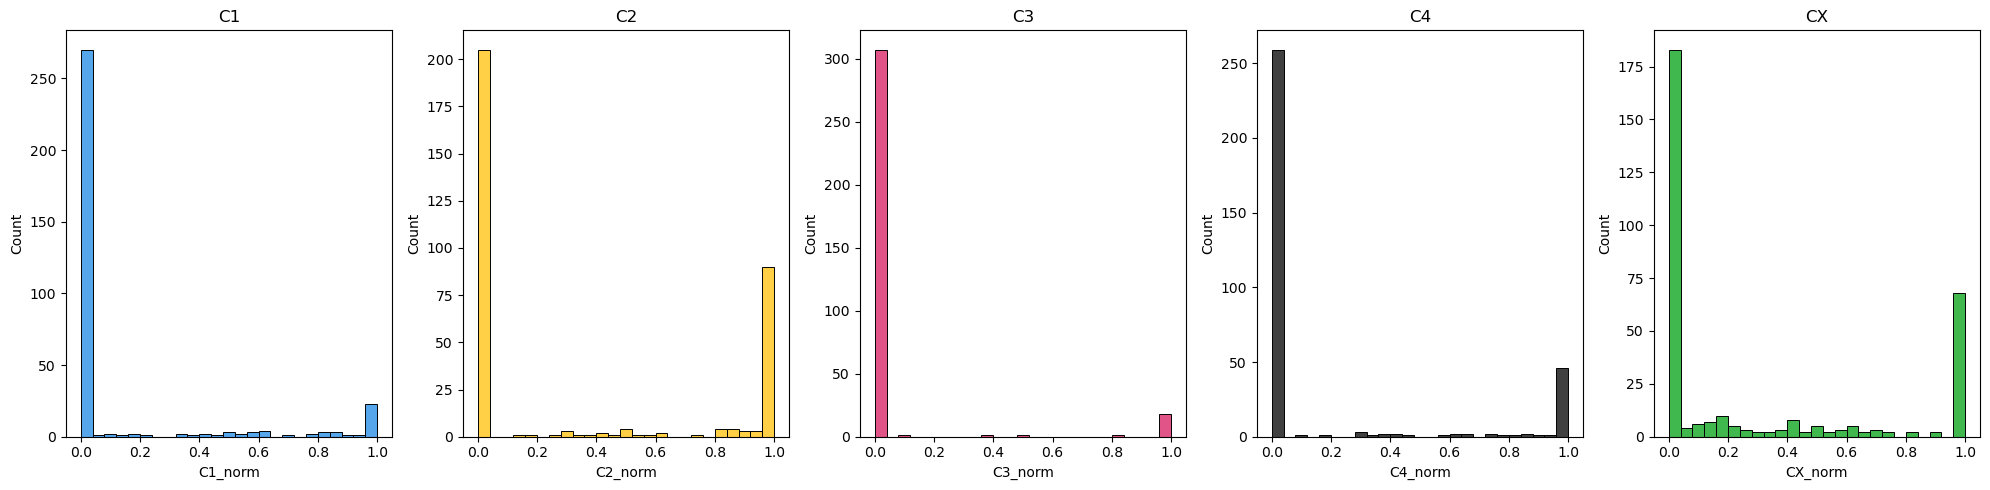

In [65]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.histplot(tmp_df['C1_norm'], bins=25, ax=axes[0], color='#1E88E5', label='C1')
sns.histplot(tmp_df['C2_norm'], bins=25, ax=axes[1], color='#FFC107', label='C2')
sns.histplot(tmp_df['C3_norm'], bins=25, ax=axes[2], color='#D81B60', label='C3')
sns.histplot(tmp_df['C4_norm'], bins=25, ax=axes[3], color='#000000', label='C4')
sns.histplot(tmp_df['CX_norm'], bins=25, ax=axes[4], color='#00A012', label='CX')

axes[0].set_title('C1')
axes[1].set_title('C2')
axes[2].set_title('C3')
axes[3].set_title('C4')
axes[4].set_title('CX')

plt.tight_layout()
plt.show()

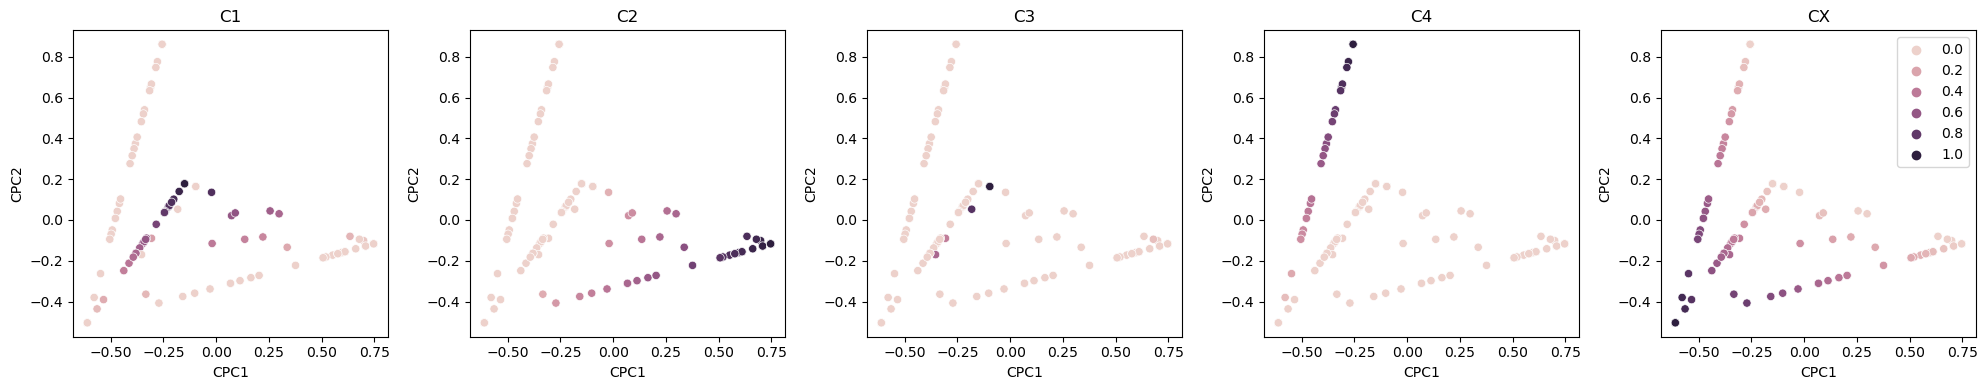

In [49]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

data_pca = pca.fit_transform(tmp_df[['C1_norm', 'C2_norm', 'C3_norm', 'C4_norm', 'CX_norm']])
tmp_df[['CPC1', 'CPC2']] = data_pca

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

sns.scatterplot(x='CPC1', y='CPC2', data=tmp_df, ax=axes[0], hue='C1_norm')
sns.scatterplot(x='CPC1', y='CPC2', data=tmp_df, ax=axes[1], hue='C2_norm')
sns.scatterplot(x='CPC1', y='CPC2', data=tmp_df, ax=axes[2], hue='C3_norm')
sns.scatterplot(x='CPC1', y='CPC2', data=tmp_df, ax=axes[3], hue='C4_norm')
sns.scatterplot(x='CPC1', y='CPC2', data=tmp_df, ax=axes[4], hue='CX_norm')


axes[0].set_title('C1')
axes[1].set_title('C2')
axes[2].set_title('C3')
axes[3].set_title('C4')
axes[4].set_title('CX')

axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()
axes[3].get_legend().remove()
axes[4].legend(loc='upper right')

plt.tight_layout()
plt.show()


# CLANS

In [50]:
# Get cluster assignments for each 5R hit
cl = []
for cx in range(len(fasta[::2])):
    if cx in C1:
        cl.append(0)
    elif cx in C2:
        cl.append(1)
    elif cx in C3:
        cl.append(2)
    elif cx in C4:
        cl.append(3)
    else:
        cl.append(4)

In [51]:
test_id = "WP_204698829.1"
test_seq = tmp_df[tmp_df['id'] == test_id]
test_ixs = eval(test_seq['7R_ix_hendecad_strict'].values[0])

test_seq[['id', 'seq', '7R_hendecad_strict', 'C1', 'C2', 'C3', 'C4', 'CX', 'C1_norm', 'C2_norm', 'C3_norm', 'C4_norm', 'CX_norm']]

,id,seq,7R_hendecad_strict,C1,C2,C3,C4,CX,C1_norm,C2_norm,C3_norm,C4_norm,CX_norm
0,WP_204698829.1,MALRELEVEIGFnidtgvlddmnesidsamsgldalgqsgddmgag...,14,0,14,0,0,0,0.0,1.0,0.0,0.0,0.0


In [55]:
with open(clans_r7, 'r') as file:
    data = file.readlines()

data = [line.strip() for line in data]

first_pos = 3334 # 9228
last_pos = 4969  # 13813

pos = [(float(x.split()[2]), float(x.split()[1])) for x in data[first_pos:last_pos]]

x = [int(x[0]) for x in pos]
y = [int(x[1]) for x in pos]
cl = cl

hit_df = pd.DataFrame({'id': fasta_ids, 'x': x, 'y': y, 'cl': cl})

In [59]:
tmp_df['C'] = tmp_df[['C1_norm', 'C2_norm', 'C3_norm', 'C4_norm', 'CX_norm']].idxmax(axis=1)

In [73]:
# randomly sample 10 hits from each cluster
sample = tmp_df.groupby('C').apply(lambda x: x.sample(10)).reset_index(drop=True)
test_ids = sample['id'].unique()

sample = hit_df[hit_df['id'].isin(test_ids)]
sample.cl.value_counts()

cl
0    38
4    38
1    35
3    31
2    31
Name: count, dtype: int64

In [72]:
tmp_df['C']

0      C2_norm
1      CX_norm
2      CX_norm
3      CX_norm
4      CX_norm
        ...   
324    C4_norm
325    CX_norm
326    C2_norm
327    C2_norm
328    C2_norm
Name: C, Length: 329, dtype: object

In [74]:
# randomly sample 10 hits from C1
sample = tmp_df[tmp_df['C'] == 'C1_norm'].sample(10)
test_ids = sample['id'].unique()

sample = hit_df[hit_df['id'].isin(test_ids)]
sample.cl.value_counts()

cl
0    27
4     6
1     4
Name: count, dtype: int64

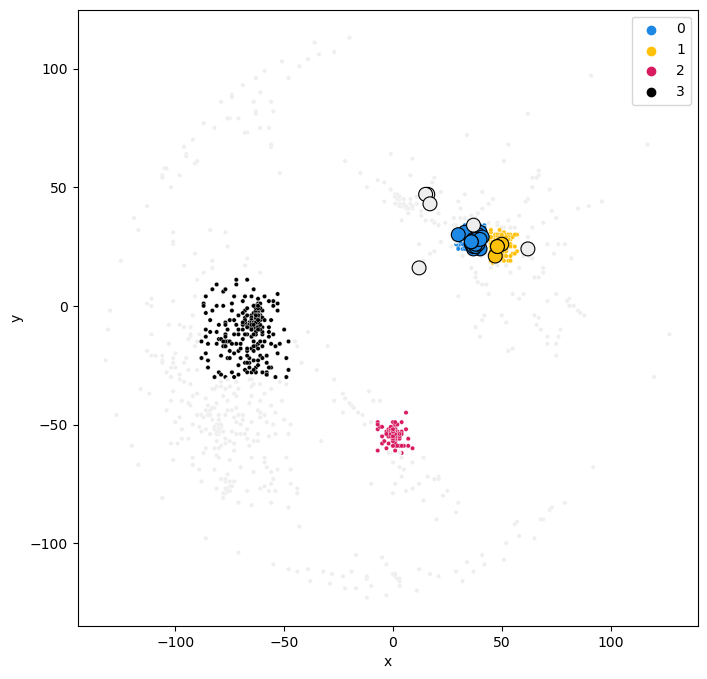

In [79]:
# hit_df[hit_df['id'] == test_id]

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=hit_df, x='x', y='y', hue='cl', palette=['#1E88E5', '#FFC107', '#D81B60', '#000000', '#EEEEEE'], s=10)
sns.scatterplot(data=sample, x='x', y='y', hue='cl', palette=['#1E88E5', '#FFC107', '#EEEEEE'], s=100, edgecolor='black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:4], labels=labels[:4])
plt.show()

# Sequence Logos

In [130]:
from Bio import SeqIO

with open('/home/enno/uni/SS24/thesis/1_seq_analysis/C1.fasta', 'r') as f:
    C1_records = list(SeqIO.parse(f, 'fasta'))

with open('/home/enno/uni/SS24/thesis/1_seq_analysis/C2.fasta', 'r') as f:
    C2_records = list(SeqIO.parse(f, 'fasta'))

with open('/home/enno/uni/SS24/thesis/1_seq_analysis/C3.fasta', 'r') as f:
    C3_records = list(SeqIO.parse(f, 'fasta'))

with open('/home/enno/uni/SS24/thesis/1_seq_analysis/C4.fasta', 'r') as f:
    C4_records = list(SeqIO.parse(f, 'fasta'))

In [137]:
def cut_sequences(records, C, R=5):
    
    with open(f'/home/enno/uni/SS24/thesis/1_seq_analysis/C{C}_cut.fasta', 'w') as f:
        for seq in records:
            name = seq.description
            seq = str(seq.seq)
            
            for i in range(R):
                
                f.write(f'>{name}_{i}\n')
                f.write(seq[i*11:(i+1)*11] + '\n')

cut_sequences(C1_records, '1')
cut_sequences(C2_records, '2')
cut_sequences(C3_records, '3')